
### Instructions

0. Rename this file yourName_lab2.  **Not literally, yourName_lab8 (technically correct, the best kind of correct!) but use your BU ID to fill in yourName.**
1. Read all instructions carefully, ask questions if anything is confusing.  
2. Fill in the code/text blocks to answer each question.
3. Do *not* change any of the existing code provided.  The code is specifically there to help you!
4. Run the entire notebook *before* submitting it on Sakai to make sure that the code actually runs without errors.
5. **Important**: Any question for which your code fails to run will receive 0 points.
6. Have fun!
7. Extra credit (if applicable) will only be granted if this lab is turned in before the end of class
8. **Do not import any packages!**  Any packages available to you are designed to be used from their import statement down.  

Example:  Problem 1 doesn't have any import statements.  Problem 2 imports one package called "A".  Problem 3 imports one package called "B".  You may not use "A" or "B" for problem 1, you may not use "B" for problem 2 and you may use both for problem 3.  If you were to restart and rerun all cells in your notebook you would not be able to use a package prior to importing it so it logically makes sense as well!

Grab all the filenames you'll need for the lab, don't worry about what this is doing, but feel free to look up glob after the lab.  Unzip the folder that came with the lab, you should see nine txt files and keep them in the folder titled crawls **(do not move them to the same directory as the notebook!!!)**

In [2]:
import glob             
list_of_files = glob.glob('crawls/*.txt') 

This is only for helping in the lab, don't worry about becoming a regex Ninja, unless you want to, then you can worry about it 

In [3]:
import re
def parse_read_lines(string):
    return re.sub(r"[_\''\n,.;@#?!&$]+\ *", " ", string).split()

Intialize an empty dictionary called word_tracker

In [4]:
word_tracker = {}

# The main part of the lab:

Read the lines from the file (and then close the file), then loop over those lines and call my parse_read_lines function that removes punctuation and replaces with spaces.  For each of the words, lowercase it and place it in dictionary and keep a count on how many unique words hgave been seen.  This will essentially be a tripled nested for loop the structure will look something like this:

loop over the file names from list_of_files
    
    open the file
    
    read the lines

    loop over each element from the file.readlines() (this will be a string with punctuation)
        
        call the parse_read_lines function to clean the string up will split words out for you
        
        write a list comprehension to lowercase all the words
        
        loop over that list of words (this will merely be a list of words if you've done it correct)
            
            if the word is in the dictionary, increment the counter otherwise add to dictionary with count of 1
 

Write code to figure out what word occurs the most, also print out how many unique words you found

In [5]:
unique_list = []
#loops through the text files, opens them individually and reads lines
for x in list_of_files:
    file_open = open(x, 'r')
    lines = file_open.readlines()
    #loops over the lines, splits the words, and lowercases them
    for y in lines:
        function = parse_read_lines(y)
        words = [i.lower() for i in function]
        #loops over the words and adds them to dictionary, increments count for how many times they occur
        for z in words:
            if z in word_tracker:
                word_tracker[z] += 1
            else:
                word_tracker[z] = 1
            if z not in unique_list: #adds unique words to list only once
                unique_list.append(z)
                
print('Dictionary Length: ', len(word_tracker))
print('Most occuring word: ', max(word_tracker, key = word_tracker.get))
print('Number of unique words: ', len(unique_list))

Dictionary Length:  325
Most occuring word:  the
Number of unique words:  325


## Warning: You will need to install wordcloud via the jupyter terminal, its not a package built into anaconda
## See the word document attached to the lab for instructions on how to do it

### NOTE: font_path='/Library/Fonts/Verdana.ttf' if this errors out delete it, it was just my default 

In [6]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

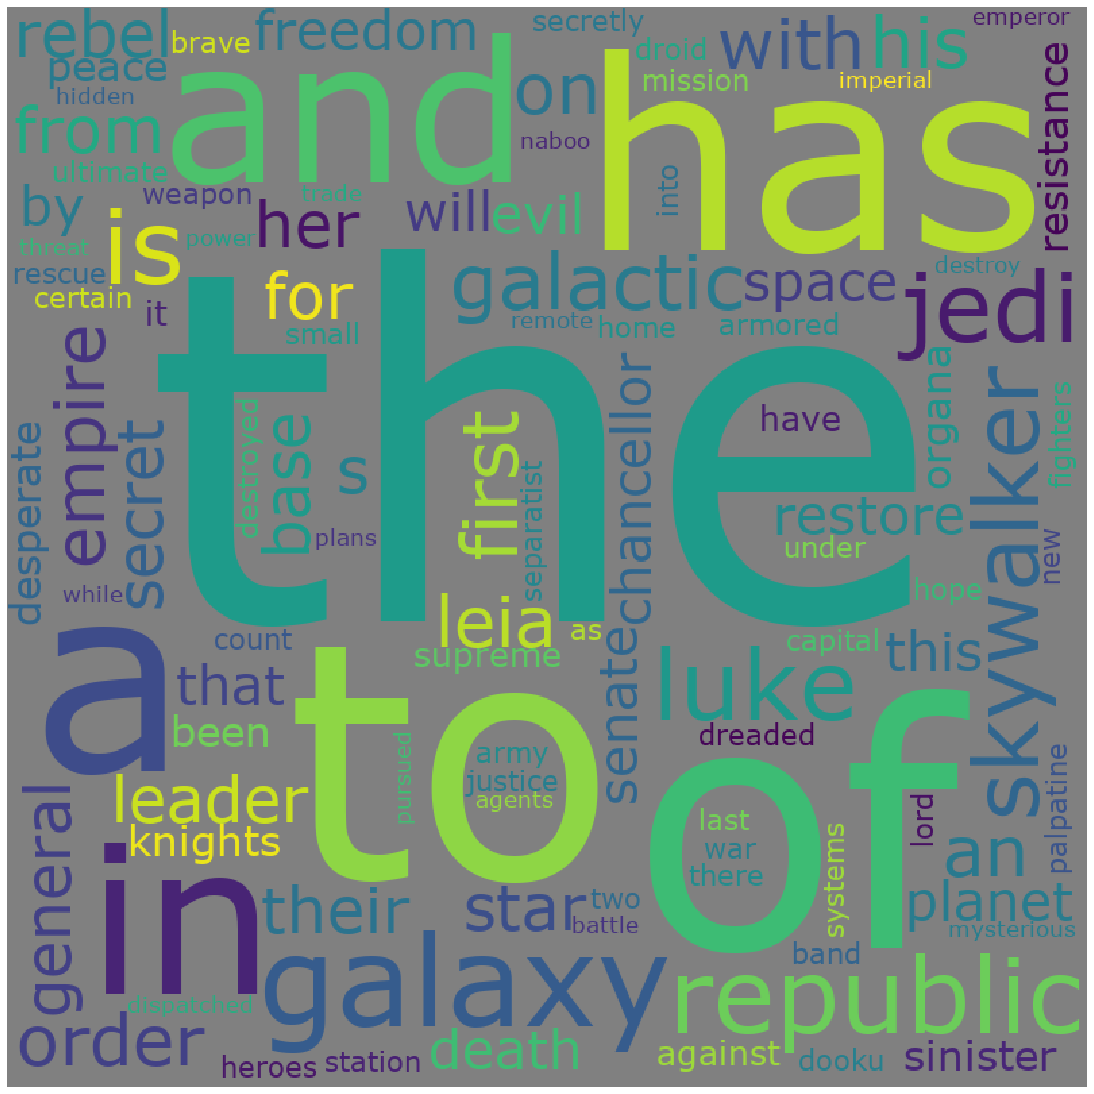

In [7]:
##Build a word cloud!!!
##Notice how just like your dictionary, the largest occuring words are not star wars themed?
##Let's fix that
  
wordcloud = WordCloud(width = 800, height = 800, font_path='/Library/Fonts/Verdana.ttf',
                background_color ='grey', 
                stopwords = STOPWORDS, 
                min_font_size = 15).generate_from_frequencies(word_tracker)
  
# plot the WordCloud image                        
plt.figure(figsize = (15, 15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## STOPWORDS

https://en.wikipedia.org/wiki/Stop_words

In Natural Language Processing (an interest area of mine) words that are common like "the","or" and more do not add anything meaningful.  We are going to take a popular list of stop words, ie words that don't add merit and remove them from our dictionary.

Loop over the STOPWORDS set imported above, and delete all entries in your word_tracker that are present in Stopwords

After you have deleted all stopword entries in your dictionary, compare the size of this new dictionary against your old one.  Roughly what percentage of words were considered stop words?  Also go find the word that occurs the most after the stop words have been removed.  

In [8]:
# Loops through stopwords, if a stopword is in the dictionary it is deleted
for i in STOPWORDS: 
    if i in word_tracker:
        del word_tracker[i]
#Finds the percentage of words that were stop words in dictionary before deletion
pct = ((len(unique_list) - len(word_tracker)) / len(unique_list)) * 100

print('Most occuring word: ', max(word_tracker, key = word_tracker.get))
print('Percentage of stopwords: ', round(pct, 0), "%")

Most occuring word:  galaxy
Percentage of stopwords:  14.0 %


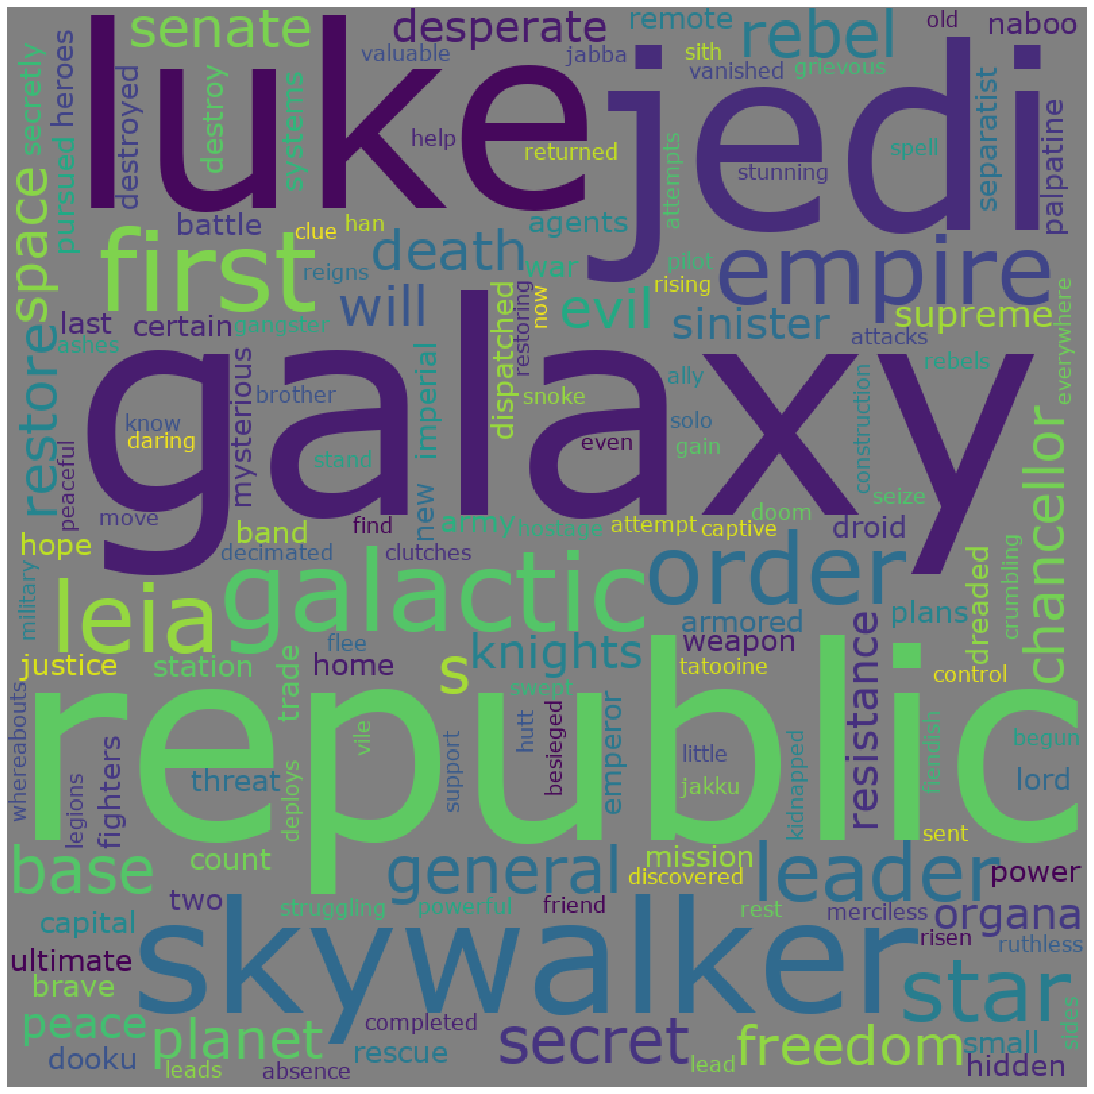

In [9]:
## Now this is a much better star wars word cloud!!!

wordcloud = WordCloud(width = 800, height = 800, font_path='/Library/Fonts/Verdana.ttf',
                background_color ='grey', 
                stopwords = STOPWORDS, 
                min_font_size = 15).generate_from_frequencies(word_tracker)
  
# plot the WordCloud image                        
plt.figure(figsize = (15, 15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Feedback: what did you like about this lab?  What didn't you like?

your answer here:

In [ ]:
# This lab was straight forward and all of the wordcloud stuff is pretty cool. 
# There wasn't anything specific I didn't like about it 